Import all the packages that we need during the project

In [84]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

Let's start with loading dataset, in order to implement it we define function load_data

In [85]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [86]:
# load dataset
X, y = load_data("data/data_linear.txt")

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function. Then, we fit our model on train set using fit()

In [87]:
model = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [89]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

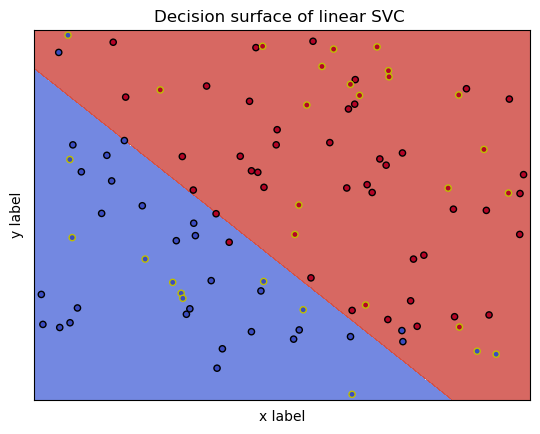

In [90]:
fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
X2, X3 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X[:,0],X[:,1])

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.scatter(X2, X3, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='y')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision surface of linear SVC ')
plt.show()

It  the above plot, 

red points encircled with black color - accepted microchips on training data

red points encircled with yellow color - accepted microchips on test data

blue points encircled with black color - rejected microchips on training data

blue points encircled with yellow color - rejected microchips on test data

We can perform prediction on the test set using predict() and compute the accuracy of the model

In [91]:
#Compute accuracy on our training set
y_pred = clf.predict(X_test)
print('Train Accuracy: %f'%(np.mean(y_pred == y_test) * 100))

Train Accuracy: 90.000000
